![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

In [11]:
# Python program for Dijkstra's single 
# source shortest path algorithm. The program is 
# for adjacency matrix representation of the graph
  
# https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

# Library for INT_MAX
import sys
  
class Graph():
  
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] 
                    for row in range(vertices)]
  
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
  
    # A utility function to find the vertex with 
    # minimum distance value, from the set of vertices 
    # not yet included in shortest path tree
    # much better would be to implement this with a min heap!
    def astar_heuristic(self, src,dest):
        # TODO estimate distance BUT NOT OVERSTIMATE from src to dest
        # with cost 0 it is just a Dijkstra algorithm
        return 0 
    
    def minDistance(self, dist, sptSet,dest):
  
        # Initilaize minimum distance for next node
        min_dist = sys.maxsize
        min_index = 0
        # Search not nearest vertex not in the 
        # shortest path tree
        for v in range(self.V): # by having a loop we will be beomce quadratic |V|*|V|
            dist[v] = dist[v] + self.astar_heuristic(v,dest)
            if dist[v] < min_dist + sptSet[v] == False:
                min_dist = dist[v]
                min_index = v
          
        return min_index
  
    # Funtion that implements Dijkstra's single source 
    # shortest path algorithm for a graph represented 
    # using adjacency matrix representation
    def dijkstra(self, src,dest): # dest only needed for A*
  
        dist = [sys.maxsize] * self.V # so initialize with positive infintie for dist
        dist[src] = 0 # set source to 0
        sptSet = [False] * self.V # we do not know any vertices shortest path
  
        for cout in range(self.V):
  
            # Pick the minimum distance vertex from 
            # the set of vertices not yet processed. 
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet,dest)
  
            # Put the minimum distance vertex in the 
            # shotest path tree
            sptSet[u] = True
  
            # Update dist value of the adjacent vertices 
            # of the picked vertex only if the current 
            # distance is greater than new distance and
            # the vertex in not in the shotest path tree
            # this is our relaxation step
            for v in range(self.V):
                if self.graph[u][v] > 0 and sptSet[v] == False and \
                dist[v] > dist[u] + self.graph[u][v]:
                        dist[v] = dist[u] + self.graph[u][v]
  
        self.printSolution(dist)


  
# This code is contributed by Divyanshu Mehta fixed by VS

In [2]:
sys.maxsize # 64bit signed infinity :)

9223372036854775807

In [3]:
2**63

9223372036854775808

In [12]:
    # Driver program
g = Graph(9)
g.graph =   [[0, 4, 0, 0, 0, 0, 0, 8, 0],
            [4, 0, 8, 0, 0, 0, 0, 11, 0],
            [0, 8, 0, 7, 0, 4, 0, 0, 2],
            [0, 0, 7, 0, 9, 14, 0, 0, 0],
            [0, 0, 0, 9, 0, 10, 0, 0, 0],
            [0, 0, 4, 14, 10, 0, 2, 0, 0],
            [0, 0, 0, 0, 0, 2, 0, 1, 6],
            [8, 11, 0, 0, 0, 0, 1, 0, 7],
            [0, 0, 2, 0, 0, 0, 6, 7, 0]
        ];
  
g.dijkstra(0,5);

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 9223372036854775807
3 	 9223372036854775807
4 	 9223372036854775807
5 	 9223372036854775807
6 	 9223372036854775807
7 	 8
8 	 9223372036854775807


In [7]:
g.dijkstra(4)

Vertex 	Distance from Source
0 	 21
1 	 22
2 	 14
3 	 9
4 	 0
5 	 10
6 	 12
7 	 13
8 	 16


In [8]:
import networkx as nx
G = nx.Graph()

In [9]:
import matplotlib.pyplot as plt


In [10]:
G = nx.petersen_graph()

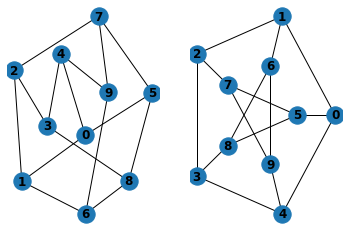

In [11]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

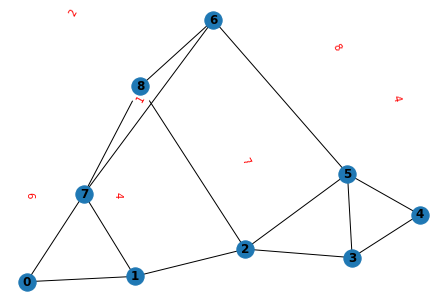

In [12]:
G = nx.Graph()
G.add_weighted_edges_from([(0,1,4),(0,7,8),(2,8,2),
                           (7,6,1),(8,6,6),
                           (6,5,2),(5,4,10),(7,8,7),
                           (7,1,11),(1,2,8),(2,3,7),(2,5,4),(3,5,14),(4,3,9)])
pos=nx.shell_layout(G)
nx.draw(G, with_labels=True, font_weight='bold') 
edge_labels = nx.get_edge_attributes(G,'weight') # key is edge, pls check for your case
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore
out = nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')

In [26]:
type(out)

dict

In [13]:
length, path = nx.single_source_dijkstra(G, 0)

In [14]:
type(length)

dict

In [15]:
length

{0: 0, 1: 4, 7: 8, 6: 9, 5: 11, 2: 12, 8: 14, 3: 19, 4: 21}